In [1]:
import os
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

import src.io as sio
import src.preprocessing as spp
import src.fitting as sft

In [2]:
DATA_FOLDER = "20211116_FR0612-3G18_RT"
DATA_FOLDERPATH = sio.get_qudiamond_folderpath(DATA_FOLDER)
FIGURE_FOLDERPATH = sio.get_figure_folderpath(DATA_FOLDER)

In [3]:
AUTOCORR_SUBFOLDER = r"2021\11\20211126\Autocorrelation"
AUTOCORR_SUBFOLDERPATH = sio.get_qudi_data_path(os.path.join(DATA_FOLDER, AUTOCORR_SUBFOLDER))

In [8]:
df

,Time (ps),g2(t),g2(t) norm
0,-100000.0,707.0,0.0
1,-99000.0,724.0,0.0
2,-98000.0,697.0,0.0
3,-97000.0,720.0,0.0
4,-96000.0,750.0,0.0
...,...,...,...
195,95000.0,704.0,0.0
196,96000.0,744.0,0.0
197,97000.0,715.0,0.0
198,98000.0,722.0,0.0


src.io :: INFO :: Saving '20211126-1305-05_35mW_autocorrelation' to 'Z:/Data_Analysis\20211116_FR0612-3G18_RT'


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
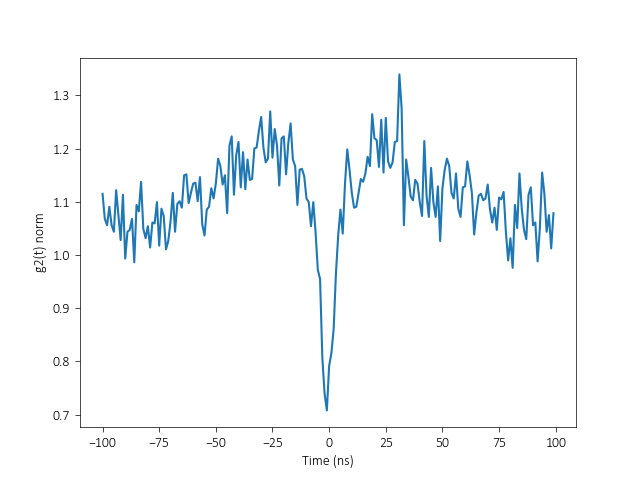

In [43]:
fig, ax = plt.subplots()

df = sio.read_into_df(os.path.join(AUTOCORR_SUBFOLDERPATH, "20211126-1305-05_35mW_autocorrelation.dat"))
ax.plot(df["Time (ps)"] / 1e3, df["g2(t) norm"], label=f"{file[17:22]}")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("g2(t) norm")

sio.save_figures(folder=FIGURE_FOLDERPATH, filename="20211126-1305-05_35mW_autocorrelation")

20211126-1300-45_100mW_autocorrelation.dat
20211126-1302-47_50mW_autocorrelation.dat
20211126-1304-05_25mW_autocorrelation.dat
20211126-1305-05_35mW_autocorrelation.dat
20211126-1307-38_40mW_autocorrelation.dat


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
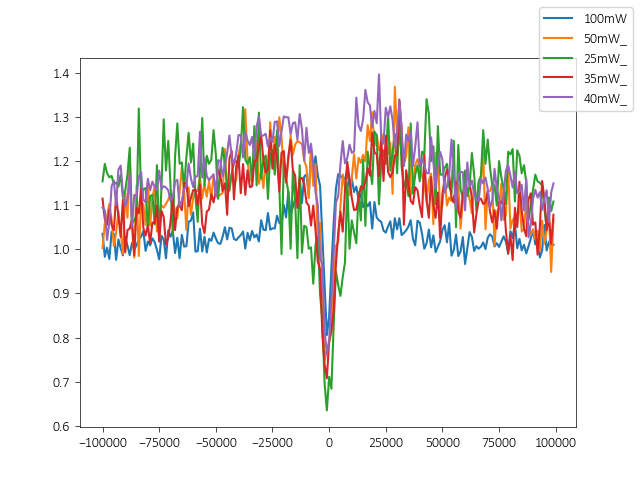

In [20]:
%matplotlib widget
fig, ax = plt.subplots()

for file in os.listdir(AUTOCORR_SUBFOLDERPATH):
    if file.endswith("mW_autocorrelation.dat"):
        print(file)
        df = sio.read_into_df(os.path.join(AUTOCORR_SUBFOLDERPATH, file))
        ax.plot(df["Time (ps)"], df["g2(t) norm"], label=f"{file[17:22]}")
fig.legend()

In [21]:
optimized_positions = np.array(
    [
       [3.43827438e-05, 9.13976768e-06, 4.71517473e-06],
       [3.49163374e-05, 9.00172571e-06, 4.71517473e-06],
       [3.53106037e-05, 9.13064807e-06, 4.71517473e-06],
       [3.46186516e-05, 9.17515368e-06, 4.71517473e-06]
    ]
)

In [22]:
for pos in optimized_positions:
    print(pos)

[3.43827438e-05 9.13976768e-06 4.71517473e-06]
[3.49163374e-05 9.00172571e-06 4.71517473e-06]
[3.53106037e-05 9.13064807e-06 4.71517473e-06]
[3.46186516e-05 9.17515368e-06 4.71517473e-06]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
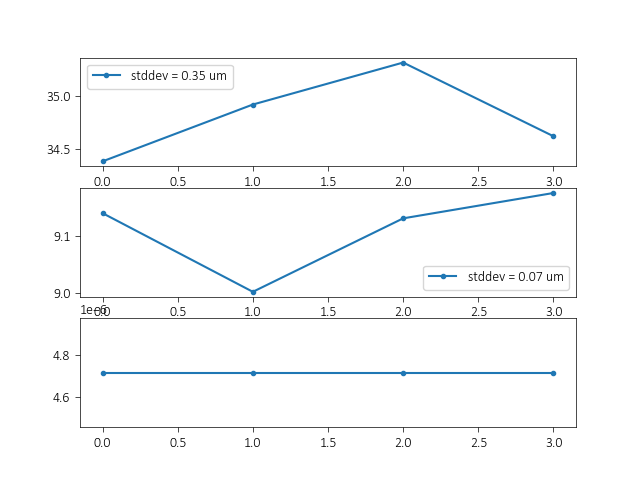

In [37]:
%matplotlib widget
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3)
ax1.plot(optimized_positions[:, 0] * 1e6, ".-", label=f"stddev = {np.std(optimized_positions[:, 0]) * 1e6:.2f} um")
ax1.legend()

ax2.plot(optimized_positions[:, 1] * 1e6, ".-", label=f"stddev = {np.std(optimized_positions[:, 1]) * 1e6:.2f} um")
ax2.legend()


ax3.plot(optimized_positions[:, 2], ".-", label=f"stddev = {np.std(optimized_positions[:, 2]) * 1e6:.2f} um")
ax3.legend()

In [34]:
N = 16

success_rate = 0.75
profit = 1000
loss = 2000 / 4

((N * success_rate) * profit) - (N * (1 - success_rate) * loss)

10000.0